# **Data Import**

In [ ]:
#Imports
#Ligar ao Google Drive
from google.colab import drive

#Gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Para a divisão dos dados
from sklearn.model_selection import train_test_split
import pickle


#Over and Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Normalização
from sklearn.preprocessing import StandardScaler

#Para os modelos de treino
from sklearn.svm import SVC  # "Support vector classifier"
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB

#Para as medidas de avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
#Ligação ao Google Drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/Projeto_parte2/predictive_maintenance.csv')

# Data Cleaning I - eliminar valores inconsistêntes

**Procurar se existem valores em falta:**

In [ ]:
data.isnull().sum()
#Se for zero em todas as colunas => não existem dados em faltas, ou seja, não existem células NULL

UID                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

**Procurar se algum valor inconsistênte:**

In [ ]:
#ProductID e Type - a primeira letra do ProductID tem que ser igual à letra presente em Type
aux = 0

for k in range(0, len(data)-1):
  if (data.iloc[k]['Product ID'][0] != data.iloc[k]['Type']):
    aux += 1
    
if aux == 0:
  print("Não existe nenhum valor de ProductID ou de Type que seja impossível!")
else:
  print("Na linha", k, "o valor de ProductID ou de Type não pode estar correto!")

Não existe nenhum valor de ProductID ou de Type que seja impossível!


In [ ]:
#Target e Failure Type - se Target for 0, Failure Type tem que ser "No Failure"
#                      - se Target for 1, Failure Type não pode ser "No Failure"
aux = 0

for k in range(0, len(data)-1):
  if (data.iloc[k]['Target'] == 0 and data.iloc[k]['Failure Type'] != "No Failure"):
    aux += 1
    print("O atributo com UID", data.iloc[k]['UID'], "o valor de Target e de Failure Type não pode estar correto!")
    
  if (data.iloc[k]['Target'] == 1 and data.iloc[k]['Failure Type'] == "No Failure"):
    aux += 1
    print("O atributo com UID", data.iloc[k]['UID'], "o valor de Target e de Failure Type não pode estar correto!")
    
if aux == 0:
  print("Não existe nenhum valor de Target e de Failure Type que seja impossível!")

O atributo com UID 1222 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 1303 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 1438 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 1749 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 2073 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 2560 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 2750 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 3066 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 3453 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 4045 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 4685 o valor de Target e de Failure Type não pode estar correto!
O atributo com UID 5472 o valor de Target e de Failure Type não pode estar c

In [ ]:
#Apagar os registos onde foram detetados erros
dataClean1 = data

for k in range(0, len(data)-1):
  if (data.iloc[k]['Target'] == 0 and data.iloc[k]['Failure Type'] != "No Failure"):
    dataClean1 = dataClean1.drop(k)
  if (data.iloc[k]['Target'] == 1 and data.iloc[k]['Failure Type'] == "No Failure"):
    dataClean1 = dataClean1.drop(k)

In [ ]:
#VERIFICAÇÃO - Garantir que todos os valores que estavam incorretos foram eliminados
aux = 0

for k in range(0, len(dataClean1)-1):
  if (dataClean1.iloc[k]['Target'] == 0 and dataClean1.iloc[k]['Failure Type'] != "No Failure"):
    aux += 1
    print("O atributo com UID", data.iloc[k]['UID'], "o valor de Target e de Failure Type não pode estar correto!")
    
  if (dataClean1.iloc[k]['Target'] == 1 and dataClean1.iloc[k]['Failure Type'] == "No Failure"):
    aux += 1
    print("O atributo com UID", dataClean1.iloc[k]['UID'], "o valor de Target e de Failure Type não pode estar correto!")
    
if aux == 0:
  print("Não existe nenhum valor de Target e de Failure Type que seja impossível!")

Não existe nenhum valor de Target e de Failure Type que seja impossível!


# Data Division

Os dados do dataset serão divididos em:
> Dados de treino (training set) -> 60%

> Dados de validação (validation set) -> 20%

> Dados de teste (testing set) -> 20% 


stratify -> garante que em cada parte da divisão ficam presentes todos os tipos de valores 


**Criar a separação dos dados e teste, treino e validação**

In [ ]:
#Dividir os dados de modo a criar X e Y (features e target)
dataX=dataClean1.drop(['Target', 'Failure Type'],axis=1)
dataYa=dataClean1['Target']
dataYb=dataClean1['Failure Type']

**CENÁRIO A: Binary Classifier**

In [ ]:
Xa_tV, Xa_test, Ya_tV, Ya_test = train_test_split(dataX, dataYa, test_size=0.2, stratify=dataYa) #Dividir os dados em dados todos de train+validation e de test
Xa_train, Xa_validation, Ya_train, Ya_validation = train_test_split(Xa_tV, Ya_tV, test_size=0.2, stratify=Ya_tV) #Dividir os dados em dados train+validation de train e validation

**CENÁRIO B: Multi-Class Problem**

In [ ]:
Xb_tV, Xb_test, Yb_tV, Yb_test = train_test_split(dataX, dataYb, test_size=0.2, stratify=dataYb) #Dividir os dados em dados todos de train+validation e de test
Xb_train, Xb_validation, Yb_train, Yb_validation = train_test_split(Xb_tV, Yb_tV, test_size=0.2, stratify=Yb_tV) #Dividir os dados em dados train+validation de train e validation

# **Data Analysis**

TARGET

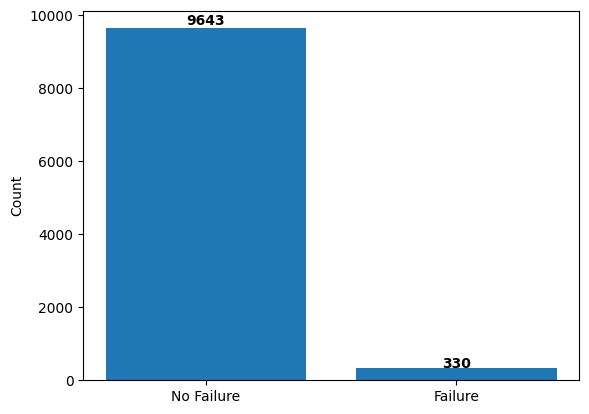

In [ ]:
#Contagem de cada valor do 'Target'
graph = plt.bar(['No Failure', 'Failure'], dataClean1['Target'].value_counts())
plt.ylabel('Count')

k=0;
contagem = dataClean1['Target'].value_counts()
for p in graph: 
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.01, str(contagem[k]), ha='center', weight='bold')
  k +=1
  
plt.show()

FAILURE TYPE

In [ ]:
dataClean1['Failure Type'].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

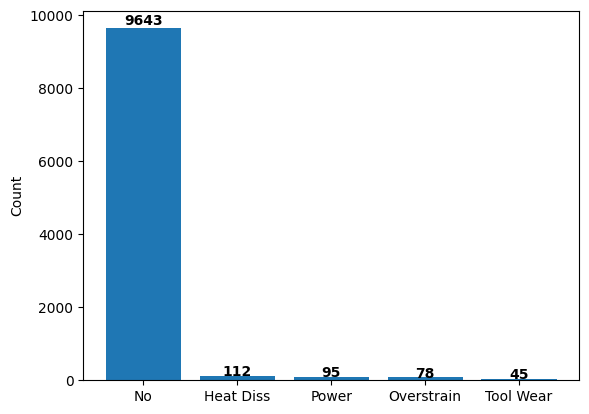

In [ ]:
#Contagem de cada valor do 'Failure Type'
graph = plt.bar(['No','Heat Diss', 'Power', 'Overstrain', 'Tool Wear'], dataClean1['Failure Type'].value_counts())
plt.ylabel('Count')

k=0;
contagem = dataClean1['Failure Type'].value_counts()
for p in graph: 
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.01, str(contagem[k]), ha='center', weight='bold')
  k +=1

plt.show()

TYPE

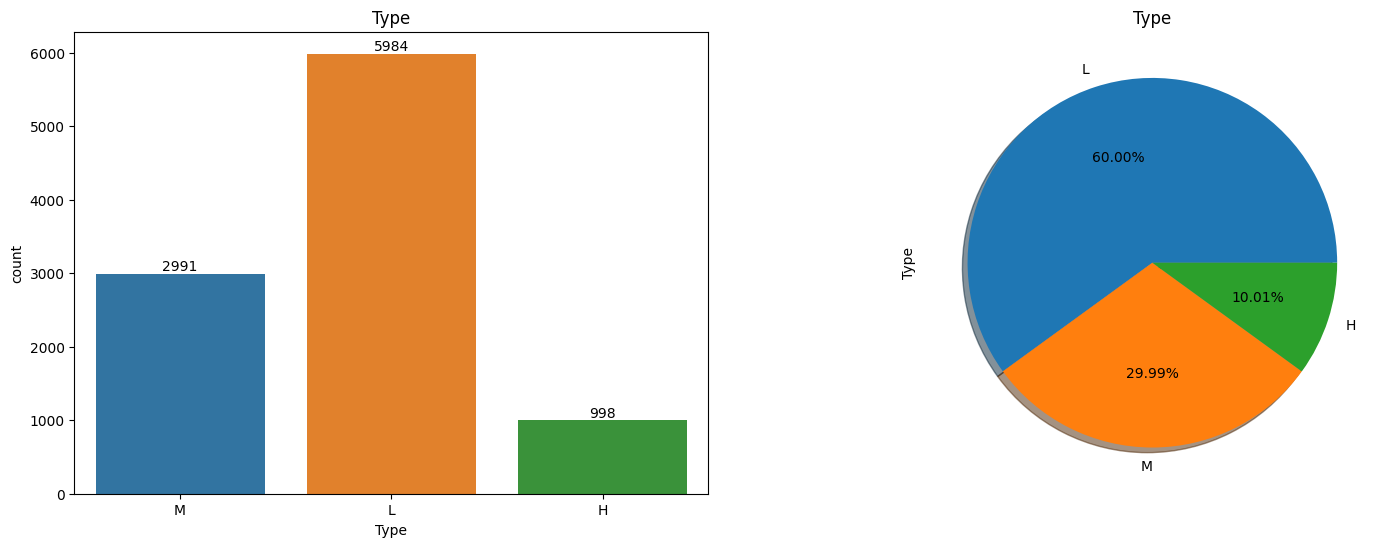

In [ ]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=dataClean1)
ax.bar_label(ax.containers[0])
plt.title("Type")

ax =plt.subplot(1,2,2)
ax=dataClean1['Type'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type")

plt.show()

AIR TEMPERATURE

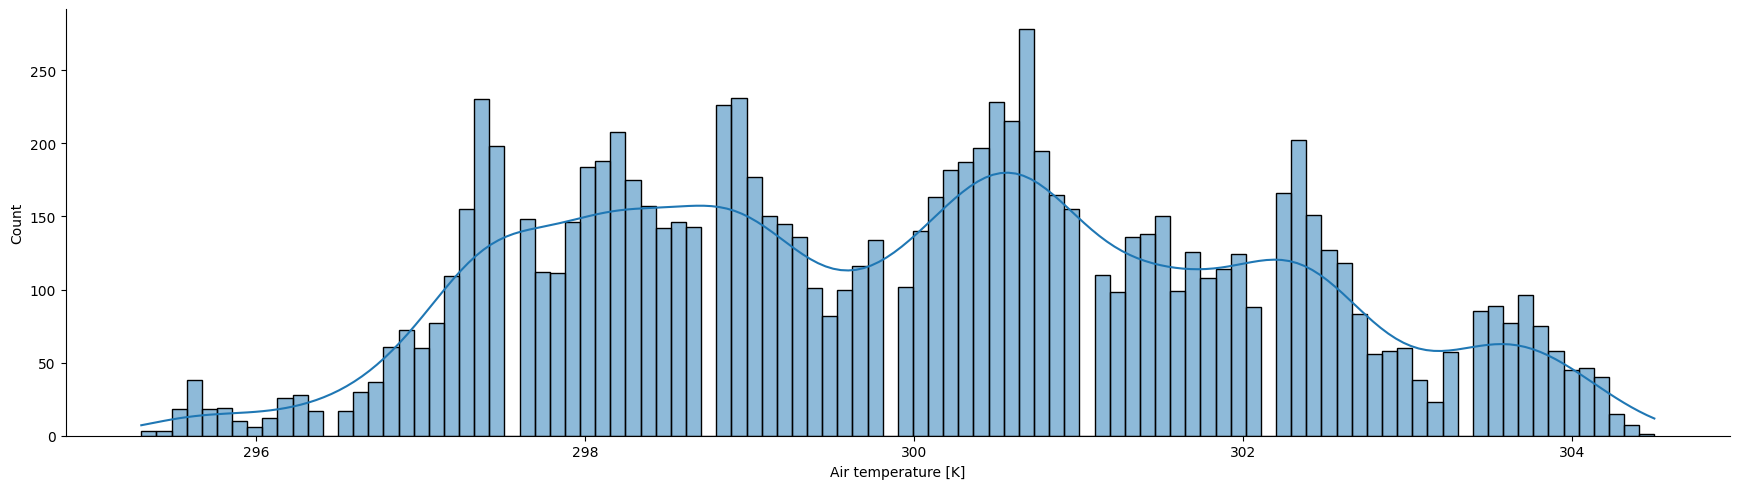

In [ ]:
sns.displot(data=dataClean1, x='Air temperature [K]', kde=True, bins = 100,height = 5, aspect = 3.5);

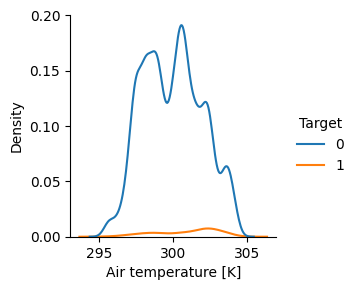

In [ ]:
sns.displot(data=dataClean1, x='Air temperature [K]', hue='Target', kind='kde', height=3)
plt.show()

PROCESS TEMPERATURE

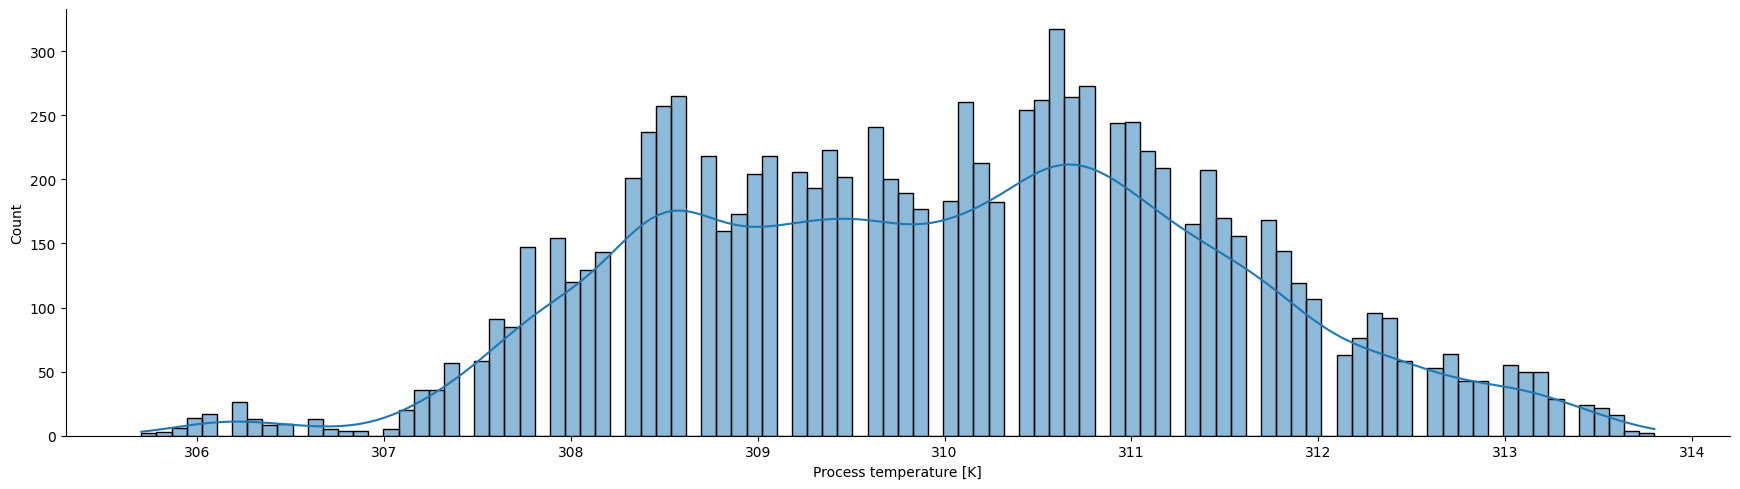

In [ ]:
sns.displot(data=dataClean1, x='Process temperature [K]', kde=True, bins = 100,height = 5, aspect = 3.5);

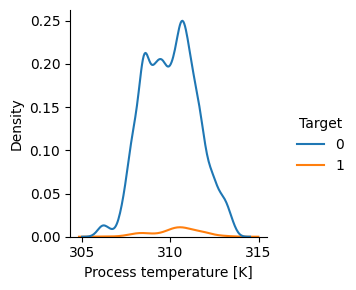

In [ ]:
sns.displot(data=dataClean1, x='Process temperature [K]', hue='Target', kind='kde', height=3)
plt.show()

ROTATIONAL SPEED

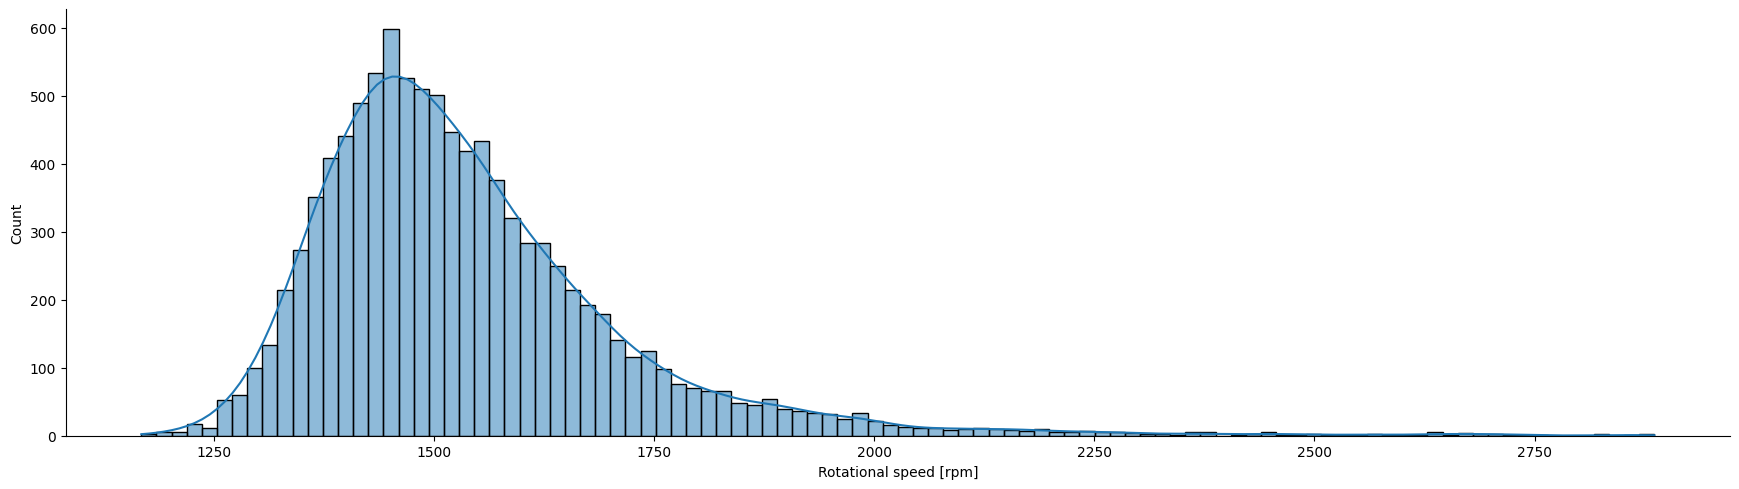

In [ ]:
sns.displot(data=dataClean1, x='Rotational speed [rpm]', kde=True, bins = 100,height = 5, aspect = 3.5);

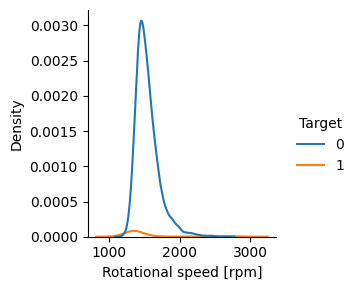

In [ ]:
sns.displot(data=dataClean1, x='Rotational speed [rpm]', hue='Target', kind='kde', height=3)
plt.show()

TORQUE

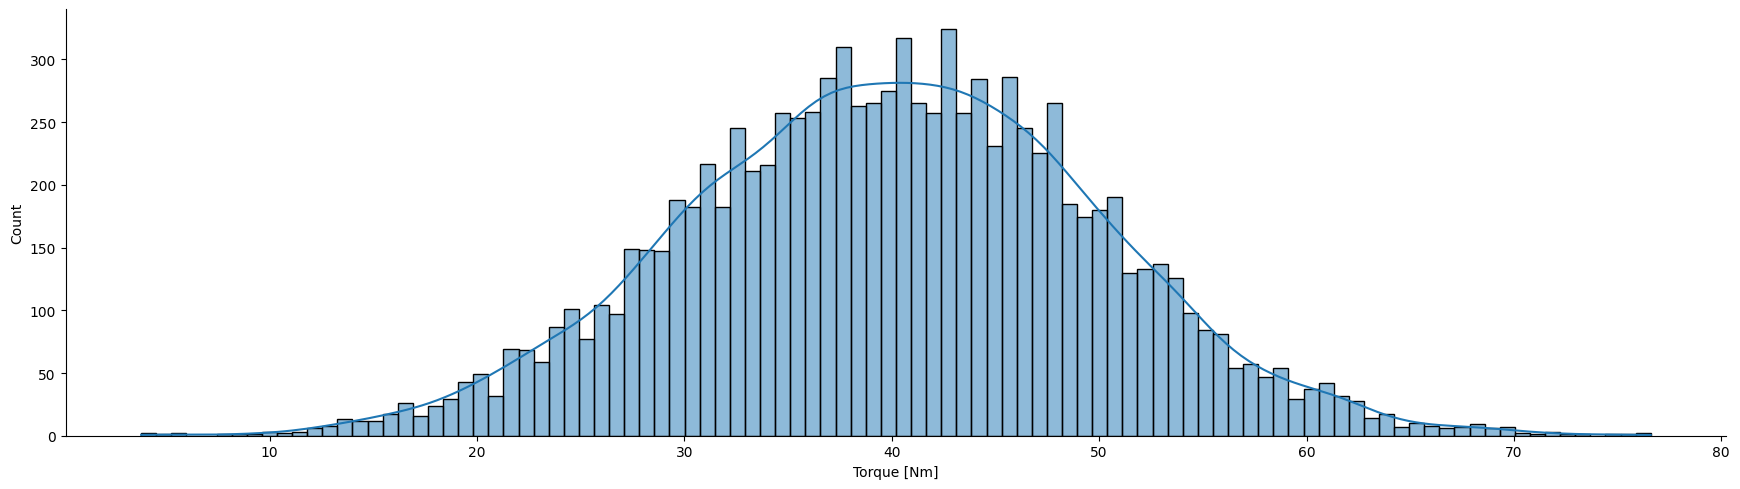

In [ ]:
sns.displot(data=dataClean1, x='Torque [Nm]', kde=True, bins = 100,height = 5, aspect = 3.5);

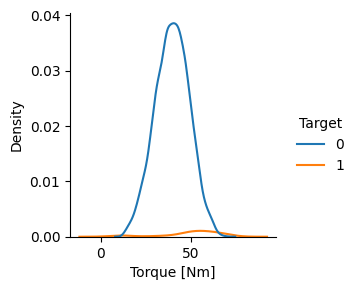

In [ ]:
sns.displot(data=dataClean1, x='Torque [Nm]', hue='Target', kind='kde', height=3)
plt.show()

TOOL WEAR

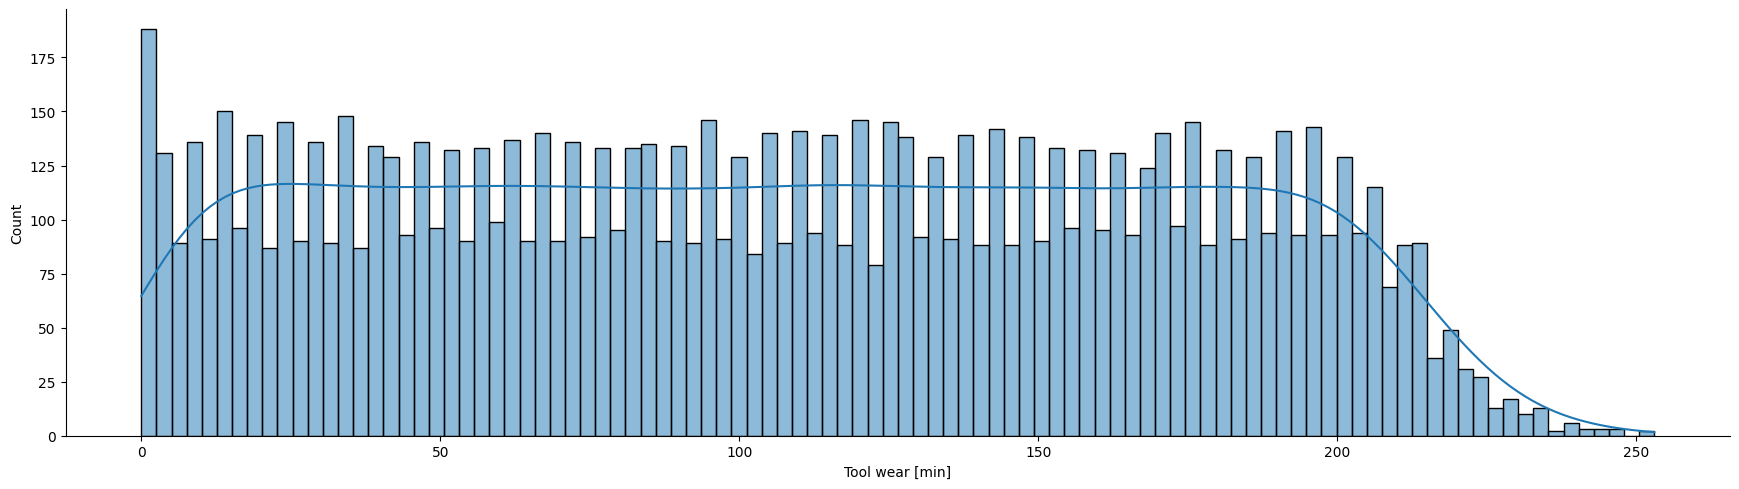

In [ ]:
sns.displot(data=dataClean1, x='Tool wear [min]', kde=True, bins = 100,height = 5, aspect = 3.5);

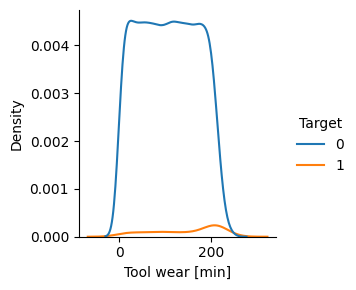

In [ ]:
sns.displot(data=dataClean1, x='Tool wear [min]', hue='Target', kind='kde', height=3)
plt.show()

# **Data Cleaning II - Correção do desbalanceamento dos dados**

**CENÁRIO A**

SÓ UNDERSAMPLING

In [ ]:
sampling_strategy = 0.2

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
Xa_train_cleanU, Ya_train_cleanU = rus.fit_resample(Xa_train, Ya_train)

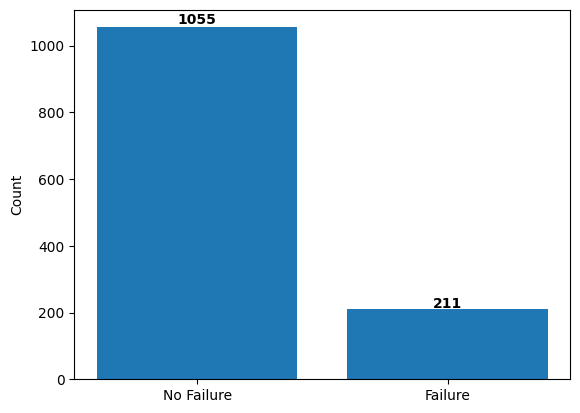

In [ ]:
#Contagem de cada valor do 'Target'
graph = plt.bar(['No Failure', 'Failure'], Ya_train_cleanU.value_counts())
plt.ylabel('Count')

k=0;
contagem = Ya_train_cleanU.value_counts()
for p in graph: 
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.01, str(contagem[k]), ha='center', weight='bold')
  k +=1
  
plt.show()

SÓ OVERSAMPLING

In [ ]:
sampling_strategy = 0.4

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
Xa_train_cleanO, Ya_train_cleanO = ros.fit_resample(Xa_train, Ya_train)

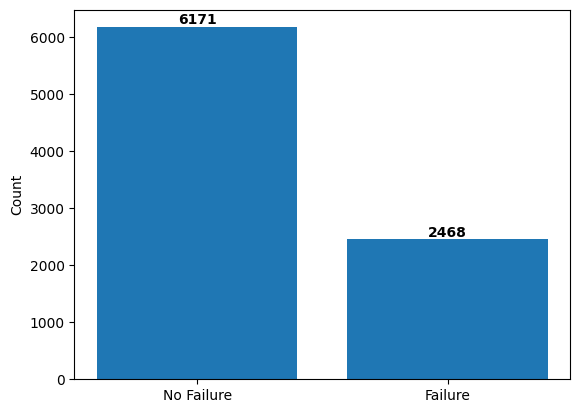

In [ ]:
#Contagem de cada valor do 'Target'
graph = plt.bar(['No Failure', 'Failure'], Ya_train_cleanO.value_counts())
plt.ylabel('Count')

k=0;
contagem = Ya_train_cleanO.value_counts()
for p in graph: 
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.01, str(contagem[k]), ha='center', weight='bold')
  k +=1
  
plt.show()

UNDER E OVERSAMPLING

In [ ]:
sampling_strategy = 0.2

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
Xa_train_cleanUO, Ya_train_cleanUO = rus.fit_resample(Xa_train, Ya_train)

In [ ]:
sampling_strategy = 0.4

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
Xa_train_cleanUO, Ya_train_cleanUO = ros.fit_resample(Xa_train_cleanUO, Ya_train_cleanUO)

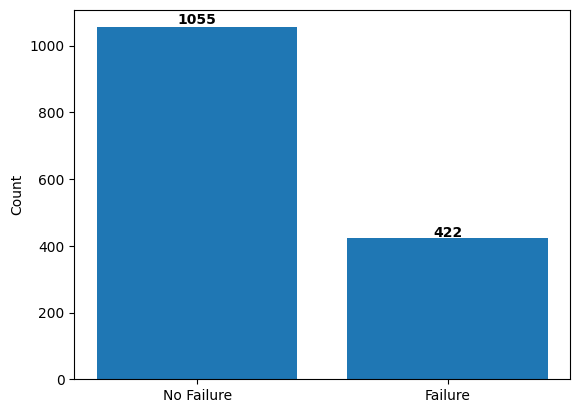

In [ ]:
#Contagem de cada valor do 'Target'
graph = plt.bar(['No Failure', 'Failure'], Ya_train_cleanUO.value_counts())
plt.ylabel('Count')

k=0;
contagem = Ya_train_cleanUO.value_counts()
for p in graph: 
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.01, str(contagem[k]), ha='center', weight='bold')
  k +=1
  
plt.show()

**CENÁRIO B**

SÓ UNDERSAMPLING

In [ ]:
aux = Yb_train.value_counts()['No Failure']
aux = int(aux/2)

rus = RandomUnderSampler(sampling_strategy={'No Failure':aux})
Xb_train_cleanU, Yb_train_cleanU = rus.fit_resample(Xb_train, Yb_train)

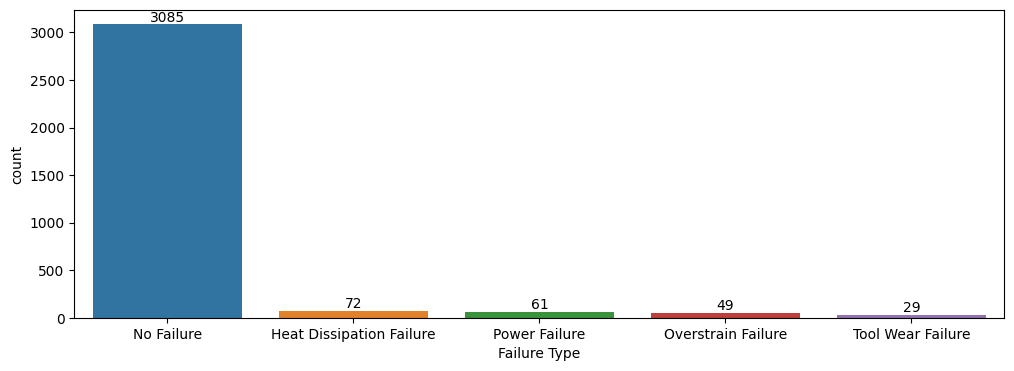

In [ ]:
#Contagem de cada valor do 'Failure Type'
ax = plt.figure(figsize=(12,4))
ax = sns.countplot(x=Yb_train_cleanU, order = Yb_train_cleanU.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

SÓ OVERSAMPLING

In [ ]:
aux1 = Yb_train.value_counts()['Heat Dissipation Failure']
aux1 = int(aux1*10)

aux2 = Yb_train.value_counts()['Power Failure']
aux2 = int(aux2*10)

aux3 = Yb_train.value_counts()['Overstrain Failure']
aux3 = int(aux3*10)

aux4 = Yb_train.value_counts()['Tool Wear Failure']
aux4 = int(aux4*10)

ros = RandomOverSampler(sampling_strategy={'Heat Dissipation Failure':aux1 , 'Power Failure':aux2 , 'Overstrain Failure':aux3 , 'Tool Wear Failure':aux4})
Xb_train_cleanO, Yb_train_cleanO = ros.fit_resample(Xb_train, Yb_train)

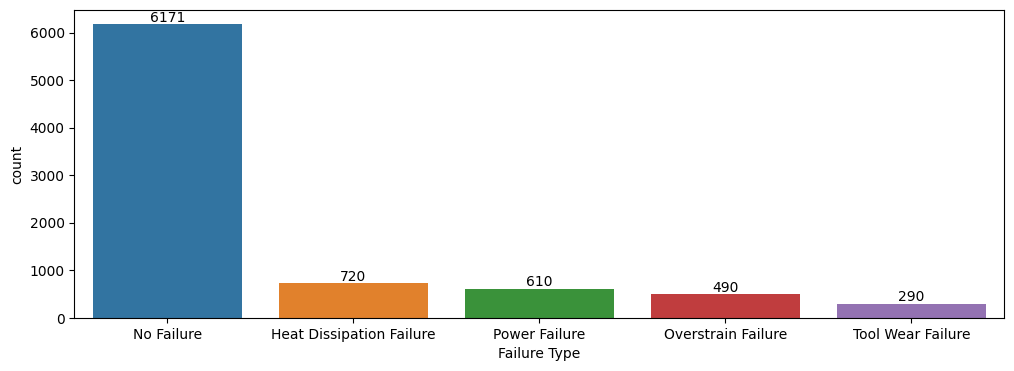

In [ ]:
#Contagem de cada valor do 'Failure Type'
ax = plt.figure(figsize=(12,4))
ax = sns.countplot(x=Yb_train_cleanO, order = Yb_train_cleanO.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

UNDER E OVERSAMPLING

In [ ]:
aux = Yb_train.value_counts()['No Failure']
aux = int(aux/2)

rus = RandomUnderSampler(sampling_strategy={'No Failure':aux})
Xb_train_cleanUO, Yb_train_cleanUO = rus.fit_resample(Xb_train, Yb_train)

In [ ]:
aux1 = Yb_train.value_counts()['Heat Dissipation Failure']
aux1 = int(aux1*10)

aux2 = Yb_train.value_counts()['Power Failure']
aux2 = int(aux2*10)

aux3 = Yb_train.value_counts()['Overstrain Failure']
aux3 = int(aux3*10)

aux4 = Yb_train.value_counts()['Tool Wear Failure']
aux4 = int(aux4*10)

ros = RandomOverSampler(sampling_strategy={'Heat Dissipation Failure':aux1 , 'Power Failure':aux2 , 'Overstrain Failure':aux3 , 'Tool Wear Failure':aux4})
Xb_train_cleanUO, Yb_train_cleanUO = ros.fit_resample(Xb_train_cleanUO, Yb_train_cleanUO)

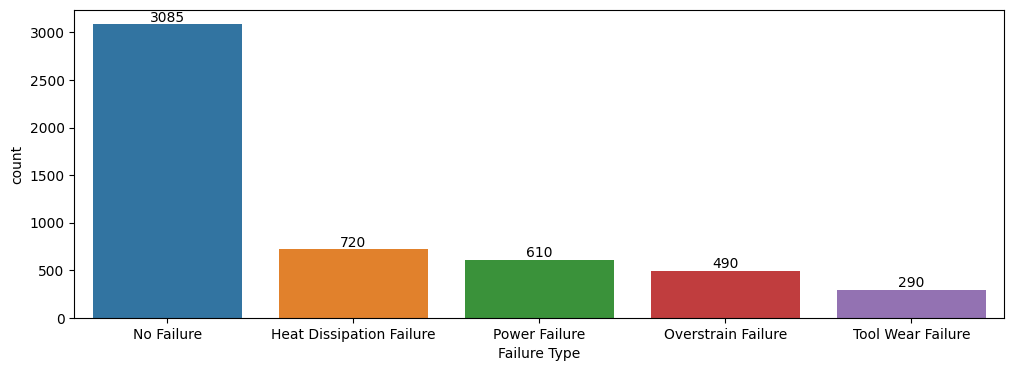

In [ ]:
#Contagem de cada valor do 'Failure Type'
ax = plt.figure(figsize=(12,4))
ax = sns.countplot(x=Yb_train_cleanUO, order = Yb_train_cleanUO.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

UNDER E OVERSAMPLING - 2ª tentativa

Na tentativa anterior, o número de casos 'No Failure' fica quase igual à soma dos casos em que acontecem falhas. O que não representa a realidade...

In [ ]:
aux = Yb_train.value_counts()['No Failure']
aux = int(aux/2)

rus = RandomUnderSampler(sampling_strategy={'No Failure':aux})
Xb_train_cleanUO, Yb_train_cleanUO = rus.fit_resample(Xb_train, Yb_train)

In [ ]:
aux1 = Yb_train.value_counts()['Heat Dissipation Failure']
aux1 = int(aux1*5)

aux2 = Yb_train.value_counts()['Power Failure']
aux2 = int(aux2*5)

aux3 = Yb_train.value_counts()['Overstrain Failure']
aux3 = int(aux3*5)

aux4 = Yb_train.value_counts()['Tool Wear Failure']
aux4 = int(aux4*5)

ros = RandomOverSampler(sampling_strategy={'Heat Dissipation Failure':aux1 , 'Power Failure':aux2 , 'Overstrain Failure':aux3 , 'Tool Wear Failure':aux4})
Xb_train_cleanUO, Yb_train_cleanUO = ros.fit_resample(Xb_train_cleanUO, Yb_train_cleanUO)

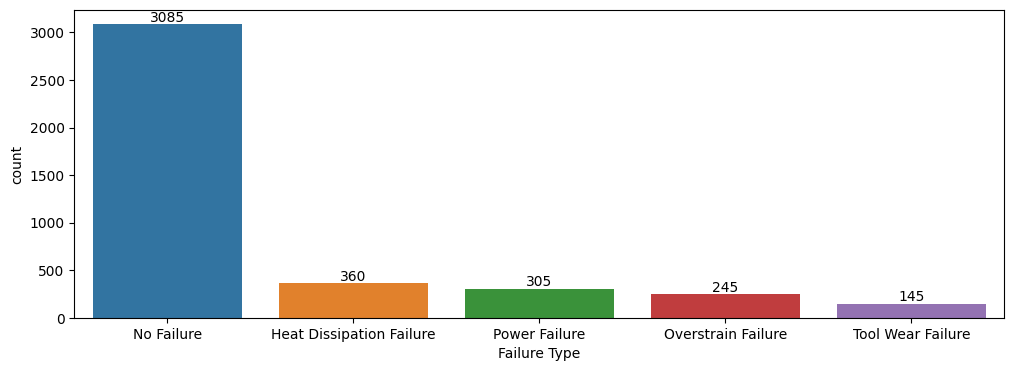

In [ ]:
#Contagem de cada valor do 'Failure Type'
ax = plt.figure(figsize=(12,4))
ax = sns.countplot(x=Yb_train_cleanUO, order = Yb_train_cleanUO.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

Definição final dos dados de treino "limpos"

In [ ]:
Xa_train_clean = Xa_train_cleanUO
Ya_train_clean = Ya_train_cleanUO

Xb_train_clean = Xb_train_cleanUO
Yb_train_clean = Yb_train_cleanUO

# **Data Cleaning III - Eliminação de atributos irrelevantes e alteração de características categóricas para numéricas**

Como o  UID e o ProductID é um identificador único, não irá influenciar não é um parâmetro que nos interesse ter nos modelos de treino.

In [ ]:
Xa_train_clean = Xa_train_clean.drop(['Product ID'], axis=1)
Xa_validation = Xa_validation.drop(['Product ID'], axis=1)
Xa_test = Xa_test.drop(['Product ID'], axis=1)

Xb_train_clean = Xb_train_clean.drop(['Product ID'], axis=1)
Xb_validation = Xb_validation.drop(['Product ID'], axis=1)
Xb_test = Xb_test.drop(['Product ID'], axis=1)


Xa_train_clean = Xa_train_clean.drop(['UID'], axis=1)
Xa_validation = Xa_validation.drop(['UID'], axis=1)
Xa_test = Xa_test.drop(['UID'], axis=1)

Xb_train_clean = Xb_train_clean.drop(['UID'], axis=1)
Xb_validation = Xb_validation.drop(['UID'], axis=1)
Xb_test = Xb_test.drop(['UID'], axis=1)

Na construção dos modelos está a acontecer o seguinte erro: "ValueError: could not convert string to float: 'L'"

Temos então que transformar Type em identificador multiclasse:
  
  -> L = 1 

  -> M = 2

  -> H = 3

In [ ]:
Xa_train_clean['Type'] = Xa_train_clean['Type'].replace('L',1)
Xa_train_clean['Type'] = Xa_train_clean['Type'].replace('M',2)
Xa_train_clean['Type'] = Xa_train_clean['Type'].replace('H',3)
Xa_validation['Type'] = Xa_validation['Type'].replace('L',1)
Xa_validation['Type'] = Xa_validation['Type'].replace('M',2)
Xa_validation['Type'] = Xa_validation['Type'].replace('H',3)
Xa_test['Type'] = Xa_test['Type'].replace('L',1)
Xa_test['Type'] = Xa_test['Type'].replace('M',2)
Xa_test['Type'] = Xa_test['Type'].replace('H',3)

Xb_train_clean['Type'] = Xb_train_clean['Type'].replace('L',1)
Xb_train_clean['Type'] = Xb_train_clean['Type'].replace('M',2)
Xb_train_clean['Type'] = Xb_train_clean['Type'].replace('H',3)
Xb_validation['Type'] = Xb_validation['Type'].replace('L',1)
Xb_validation['Type'] = Xb_validation['Type'].replace('M',2)
Xb_validation['Type'] = Xb_validation['Type'].replace('H',3)
Xb_test['Type'] = Xb_test['Type'].replace('L',1)
Xb_test['Type'] = Xb_test['Type'].replace('M',2)
Xb_test['Type'] = Xb_test['Type'].replace('H',3)

# **Data Cleaning IV - Normalização dos dados**

In [ ]:
scaler = StandardScaler()
Xa_train_clean_norm = scaler.fit_transform(Xa_train_clean)
Xa_validation_norm = scaler.fit_transform(Xa_validation)
Xa_test_norm = scaler.fit_transform(Xa_test)

Xb_train_clean_norm = scaler.fit_transform(Xb_train_clean)
Xb_validation_norm = scaler.fit_transform(Xb_validation)
Xb_test_norm = scaler.fit_transform(Xb_test)

# **Modelos de treino**

# ***CENÁRIO A***

CONJUNTOS A UTILIZAR:

TREINO: Xa_train_clean_norm, Ya_train_clean

VALIDAÇÃO: Xa_validation_norm, Ya_validation

TESTE: Xa_test_norm, Ya_test

# SUPPORT VECTOR MACHINES (SVM)

In [ ]:
#Criar o classificador support vector machines
clfSvm1 = SVC()

#Treinar o modelo
clfSvm1 = clfSvm1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfSvm1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8101503759398496


In [ ]:
#MELHORAMENTO - MANUAL

#clfSvm2 = SVC(kernel='linear')                     #Recall: 0.8270676691729323      
clfSvm2 = SVC(kernel='poly')                       #Recall: 0.8446115288220551        
#clfSvm2 = SVC(kernel='rbf')                        #Recall: 0.8101503759398496
#clfSvm2 = SVC(kernel='sigmoid')                    #Recall: 0.7255639097744361
#clfSvm2 = SVC(kernel='poly', C=20)                 #Recall: 0.8308270676691729
#clfSvm2 = SVC(kernel='poly', C=50)                 #Recall: 0.8358395989974937
#clfSvm2 = SVC(kernel='poly', C=500)                #Recall: 0.8358395989974937
#clfSvm2 = SVC(kernel='poly', C=5)                  #Recall: 0.8339598997493735
#clfSvm2 = SVC(gamma='auto')                        #Recall: 0.8101503759398496
#clfSvm2 = SVC(max_iter=-1)                         #Recall: 0.8101503759398496

clfSvm2 = clfSvm2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred2 = clfSvm2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))

Recall:  0.8446115288220551


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'C': [1, 2, 20, 50, 200]}


clfSvm3 = SVC()
clfSvm3 = GridSearchCV(clfSvm3, param_grid)
clfSvm3 = clfSvm3.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfSvm3.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred3, average='weighted'))
print(clfSvm3.best_estimator_)

Recall:  0.8489974937343359
SVC(C=200)


In [ ]:
clfSvm = clfSvm3
Y_test_pred = clfSvm.predict(Xa_test_norm)

**Medidas de Avaliação**

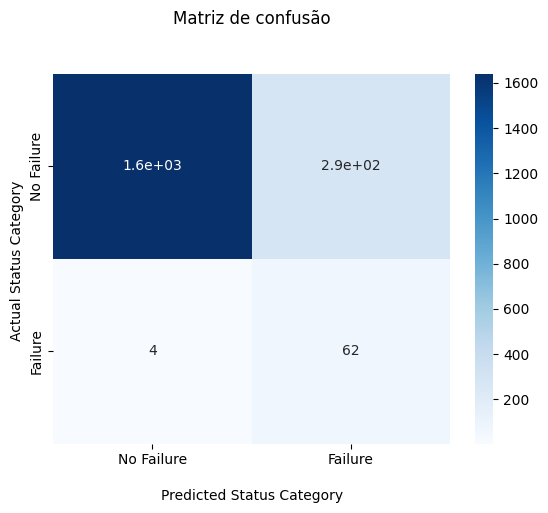

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.8531328320802005


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1929
           1       0.18      0.94      0.30        66

    accuracy                           0.85      1995
   macro avg       0.59      0.89      0.61      1995
weighted avg       0.97      0.85      0.90      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  293


# NEURAL NETWORKS (NN)

In [ ]:
#Criar o classificador neural networks
clfMlp1 = MLPClassifier()

#Treinar o modelo
clfMlp1 = clfMlp1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfMlp1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8151629072681704


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MELHORAMENTO - MANUAL
# clfMlp2 = MLPClassifier(activation='identity')                                                                                    #Recall: 0.8226817042606517
# clfMlp2 = MLPClassifier(activation='logistic')                                                                                    #Recall: 0.818295739348371 
# clfMlp2 = MLPClassifier(activation='tanh')                                                                                        #Recall: 0.793233082706767 
# clfMlp2 = MLPClassifier(activation='relu')                                                                                        #Recall: 0.8057644110275689
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd')                                                                      #Recall: 0.8339598997493735
# clfMlp2 = MLPClassifier(activation='identity', solver='adam')                                                                     #Recall: 0.8220551378446115
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=100)                                                        #Recall: 0.8471177944862155
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=50)                                                         #Recall: 0.8615288220551378
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=20)                                                         #Recall: 0.86215538847117798
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=10)                                                         #Recall: 0.8521303258145363 
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=500)                                                        #Recall: 0.8308270676691729 
clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=20, hidden_layer_sizes=(1,))                                #Recall: 0.9191729323308271
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=20, hidden_layer_sizes=(5,2,))                              #Recall: 0.8834586466165414 
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=500, hidden_layer_sizes=(1,), tol=0.01)                     #Recall: 0.8872180451127819
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=500, hidden_layer_sizes=(1,), tol=0.001)                    #Recall: 0.8289473684210527
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=500, hidden_layer_sizes=(1,), tol=0.1)                      #Recall: 0.7832080200501254
# clfMlp2 = MLPClassifier(activation='identity', solver='sgd', max_iter=500, hidden_layer_sizes=(1,), tol=0.01, random_state=1)     #Recall: 0.6942355889724311

clfMlp2 = clfMlp2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred2 = clfMlp2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))

Recall:  0.9191729323308271


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'activation': ('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('sgd', 'adam'),
              'max_iter': [200, 500, 800, 1000],
              'tol': [0.1, 0.01, 0.001]}



clfMlp3 = MLPClassifier()
clfMlp3 = GridSearchCV(clfMlp3, param_grid)
clfMlp3 = clfMlp3.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfMlp3.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred3, average='weighted'))
print(clfMlp3.best_estimator_)

Recall:  0.8007518796992481
MLPClassifier(max_iter=800, tol=0.001)


In [ ]:
clfMlp = clfMlp2
Y_test_pred = clfMlp.predict(Xa_test_norm)

**Medidas de Avaliação**

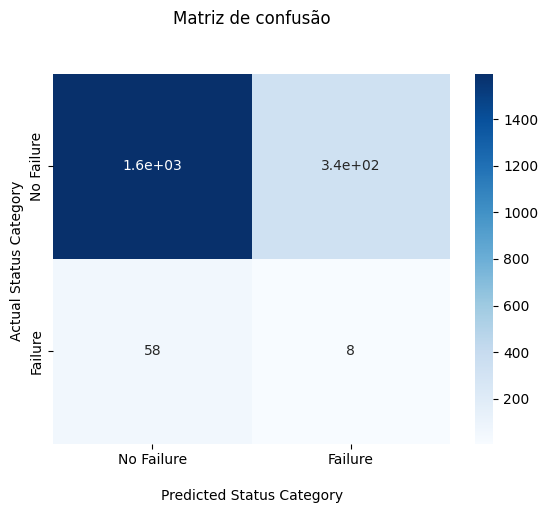

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.8030075187969925


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1929
           1       0.02      0.12      0.04        66

    accuracy                           0.80      1995
   macro avg       0.49      0.47      0.46      1995
weighted avg       0.93      0.80      0.86      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  393


# ENSEMBLES

In [ ]:
#Criar o classificador ensembles
clfEns1 = AdaBoostClassifier()

#Treinar o modelo
clfEns1 = clfEns1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfEns1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8377192982456141


In [ ]:
#MELHORAMENTO - MANUAL
#clfEns2 = AdaBoostClassifier(n_estimators=200)                                                                                                                           #Recall: 0.8483709273182958
#clfEns2 = AdaBoostClassifier(n_estimators=20)                                                                                                                            #Recall: 0.8233082706766918
#clfEns2 = AdaBoostClassifier(n_estimators=500)                                                                                                                           #Recall: 0.8421052631578947
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)                                                                                      #Recall: 0.8483709273182958
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=200)                                                                                     #Recall: 0.8515037593984962
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=50), n_estimators=200)                                                                                     #Recall: 0.8483709273182958
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="entropy"), n_estimators=200)                                                                #Recall: 0.856516290726817
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss"), n_estimators=200)                                                               #Recall: 0.8615288220551378
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='best'), n_estimators=200)                                              #Recall: 0.8471177944862155
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random'), n_estimators=200)                                            #Recall: 0.8941102756892231
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random', min_samples_split=5), n_estimators=200)                       #Recall: 0.8903508771929824
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random', min_samples_split=2), n_estimators=200)                       #Recall: 0.8941102756892231
clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random', min_samples_split=2, min_samples_leaf=10), n_estimators=200)   #Recall: 0.900375939849624
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random', min_samples_split=2, min_samples_leaf=20), n_estimators=200)  #Recall: 0.8909774436090225
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, criterion="log_loss", splitter='random', min_samples_split=2, min_samples_leaf=5), n_estimators=200)   #Recall: 0.8916040100250626

clfEns2 = clfEns2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred2 = clfEns2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))

Recall:  0.900375939849624


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {"n_estimators": (500,1000,2000),
              "learning_rate": (0.001,0.01,0.1)}

clfEns3 = AdaBoostClassifier()
clfEns3 = GridSearchCV(clfEns3, param_grid)
clfEns3 = clfEns3.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfEns3.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred3, average='weighted'))
print(clfEns3.best_estimator_)

Recall:  0.843358395989975
AdaBoostClassifier(learning_rate=0.1, n_estimators=2000)


In [ ]:
clfEns = clfEns2
Y_test_pred = clfEns.predict(Xa_test_norm)

**Medidas de Avaliação**

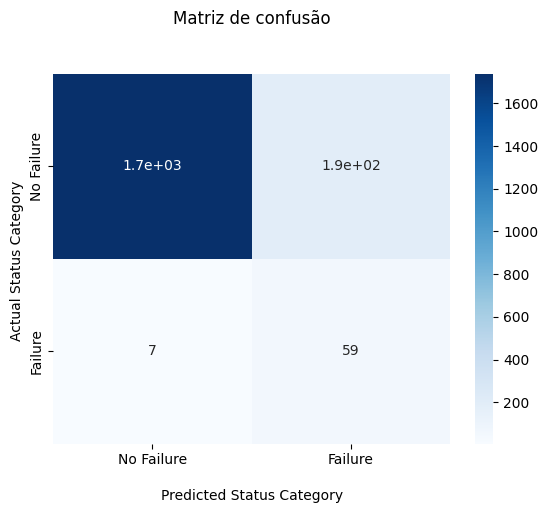

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.9007518796992481


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      1929
           1       0.24      0.89      0.37        66

    accuracy                           0.90      1995
   macro avg       0.62      0.90      0.66      1995
weighted avg       0.97      0.90      0.93      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  198


# DECISION TREES

In [ ]:
#Criar o classificador árvore de decisão
clfDtc1 = DecisionTreeClassifier()

#Treinar o modelo
clfDtc1 = clfDtc1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfDtc1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.849624060150376


In [ ]:
#MELHORAMENTO - MANUAL
#clfDtc2 = DecisionTreeClassifier(criterion='gini')                                                                                 #Recall: 0.850250626566416
#clfDtc2 = DecisionTreeClassifier(criterion='entropy')                                                                              #Recall: 0.8571428571428571
#clfDtc2 = DecisionTreeClassifier(criterion='log_loss')                                                                             #Recall: 0.8552631578947368
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='best')                                                             #Recall: 0.8477443609022557
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random')                                                           #Recall: 0.8527568922305765
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5)                                              #Recall: 0.8389724310776943
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random',  max_depth=10)                                            #Recall: 0.8164160401002506
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=5)                         #Recall: 0.8352130325814536
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=10)                        #Recall: 0.8327067669172933
clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=2)                         #Recall: 0.8721804511278195
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=2, min_samples_leaf=10)    #Recall: 0.7819548872180451
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=2, min_samples_leaf=5)     #Recall: 0.7474937343358395
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=2, min_samples_leaf=20)    #Recall: 0.7073934837092731


clfDtc2 = clfDtc2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred2 = clfDtc2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))

Recall:  0.8721804511278195


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'criterion': ("gini", "entropy", "log_loss"), 
              'splitter':("best", "random"),
              'min_samples_split': [2, 5, 10, 15, 25, 30, 50, 85],
              'min_samples_leaf': [1, 5, 10, 25], 
              'max_depth': [500, 1000]}

clfDtc3 = DecisionTreeClassifier()
clfDtc3 = GridSearchCV(clfDtc3, param_grid)
clfDtc3 = clfDtc3.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfDtc3.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred3, average='weighted'))
print(clfDtc3.best_estimator_)

Recall:  0.8546365914786967
DecisionTreeClassifier(criterion='entropy', max_depth=1000)


In [ ]:
clfDtc = clfDtc2
Y_test_pred = clfDtc.predict(Xa_test_norm)

**Medidas de Avaliação**

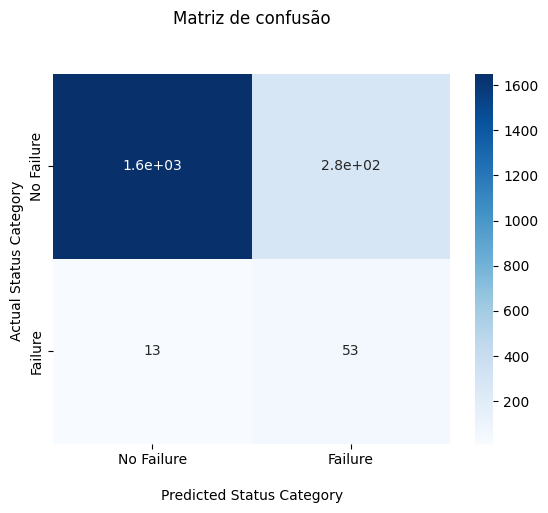

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.8531328320802005


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1929
           1       0.16      0.80      0.27        66

    accuracy                           0.85      1995
   macro avg       0.58      0.83      0.59      1995
weighted avg       0.96      0.85      0.90      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  293


# K-NEARST NEIGHBORS (KNN)

In [ ]:
#Criar o classificador knn
clfKnn1 = KNN()

#Treinar o modelo
clfKnn1 = clfKnn1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfKnn1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8157894736842105


In [ ]:
#MELHORAMENTO - MANUAL
clfKnn2 = KNN(n_neighbors=10)                         #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=20)                         #Recall: 0.8489974937343359
#clfKnn2 = KNN(n_neighbors=5)                          #Recall: 0.8157894736842105
#clfKnn2 = KNN(n_neighbors=25)                         #Recall: 0.8427318295739349
#clfKnn2 = KNN(n_neighbors=10, algorithm='auto')       #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=10, algorithm='ball_tree')  #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=10, algorithm='brute')      #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=10, leaf_size=10)           #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=10, leaf_size=100)          #Recall: 0.8515037593984962

clfKnn2 = clfKnn2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred2 = clfKnn2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))

Recall:  0.8515037593984962


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [15, 30, 45, 60, 80], 
              'p': [1, 2, 5]}

clfKnn3 = KNN()
clfKnn3 = GridSearchCV(clfKnn3, param_grid)
clfKnn3 = clfKnn3.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfKnn3.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred3, average='weighted'))
print(clfKnn3.best_estimator_)

Recall:  0.8709273182957393
KNeighborsClassifier(leaf_size=15, n_neighbors=1, p=1)


In [ ]:
clfKnn = clfKnn3
Y_test_pred = clfKnn.predict(Xa_test_norm)

**Medidas de Avaliação**

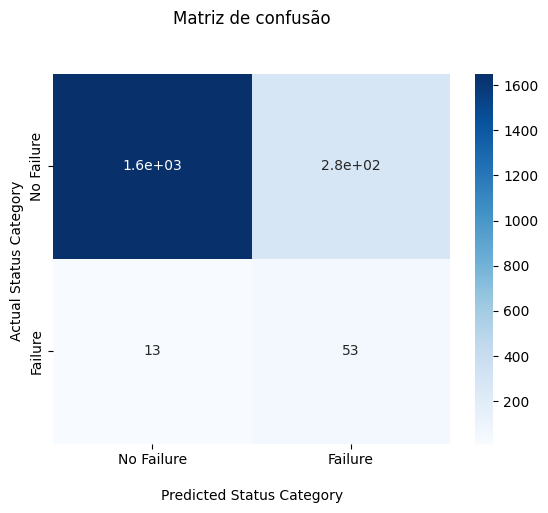

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.8531328320802005


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1929
           1       0.16      0.80      0.27        66

    accuracy                           0.85      1995
   macro avg       0.58      0.83      0.59      1995
weighted avg       0.96      0.85      0.90      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  293


# NAIVE BAYES

In [ ]:
#Criar o classificador naive bayes
clfGnb1 = GaussianNB()

#Treinar o modelo
clfGnb1 = clfGnb1.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred1 = clfGnb1.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8114035087719298


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

clfGnb2 = GaussianNB()
clfGnb2 = GridSearchCV(clfGnb2, param_grid)
clfGnb2 = clfGnb2.fit(Xa_train_clean_norm, Ya_train_clean)
Y_validation_pred3 = clfGnb2.predict(Xa_validation_norm)

print('Recall: ', recall_score(Ya_validation, Y_validation_pred2, average='weighted'))
print(clfGnb2.best_estimator_)

Recall:  0.8515037593984962
GaussianNB(var_smoothing=0.01)


In [ ]:
clfGnb = clfGnb2
Y_test_pred = clfGnb.predict(Xa_test_norm)

**Medidas de Avaliação**

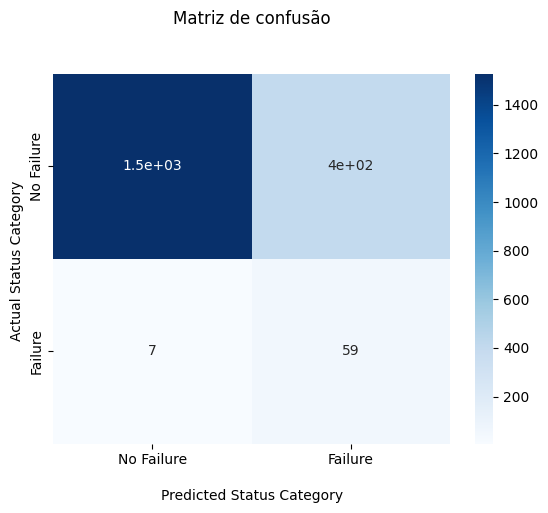

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Ya_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['No Failure', 'Failure'])
ax.yaxis.set_ticklabels(['No Failure', 'Failure'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Ya_test, Y_test_pred))

Test data accuracy:  0.7949874686716792


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Ya_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      1929
           1       0.13      0.89      0.22        66

    accuracy                           0.79      1995
   macro avg       0.56      0.84      0.55      1995
weighted avg       0.97      0.79      0.86      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Ya_test != Y_test_pred).sum())

Misscalassified samples:  409


# ***CENÁRIO B***

CONJUNTOS A UTILIZAR:

TREINO: Xb_train_clean_norm, Yb_train_clean

VALIDAÇÃO: Xb_validation_norm, Yb_validation

TESTE: Xb_test_norm, Yb_test

# SUPPORT VECTOR MACHINES (SVM)

In [ ]:
#Criar o classificador support vector machines
clfSvm1 = SVC()

#Treinar o modelo
clfSvm1 = clfSvm1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfSvm1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8728070175438597


In [ ]:
#MELHORAMENTO - MANUAL

#clfSvm2 = SVC(kernel='linear')       #Recall: 0.8709273182957393
#clfSvm2 = SVC(kernel='poly')         #Recall: 0.881578947368421
#clfSvm2 = SVC(kernel='rbf')          #Recall: 0.8728070175438597
#clfSvm2 = SVC(kernel='sigmoid')      #Recall: 0.7706766917293233
#clfSvm2 = SVC(kernel='poly', C=20)   #Recall: 0.8659147869674185
clfSvm2 = SVC(kernel='poly', C=50)   #Recall: 0.87468671679198
#clfSvm2 = SVC(kernel='poly', C=5)    #Recall: 0.8621553884711779
#clfSvm2 = SVC(gamma='auto')          #Recall: 0.8728070175438597
#clfSvm2 = SVC(max_iter=-1)           #Recall: 0.8728070175438597

clfSvm2 = clfSvm2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfSvm2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))

Recall:  0.87468671679198


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
# param_grid = {'C': [2, 20, 50, 100],
#               'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
#               'gamma': ('scale', 'auto')}

# param_grid = {'kernel': ('linear', 'rbf'),
#               'C': [2, 50, 200]}

param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'C': [1, 2, 20, 50, 200]}

clfSvm3 = SVC()
clfSvm3 = GridSearchCV(clfSvm3, param_grid)
clfSvm3 = clfSvm3.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred3 = clfSvm3.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred3, average='weighted'))
print(clfSvm3.best_estimator_)

Recall:  0.9028822055137845
SVC(C=200)


In [ ]:
clfSvm = clfSvm3
Y_test_pred = clfSvm.predict(Xb_test_norm)

**Medidas de Avaliação**

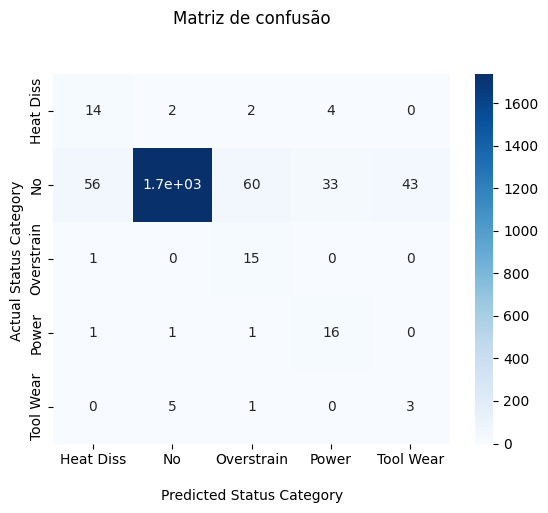

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.8947368421052632


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.19      0.64      0.30        22
              No Failure       1.00      0.90      0.95      1929
      Overstrain Failure       0.19      0.94      0.32        16
           Power Failure       0.30      0.84      0.44        19
       Tool Wear Failure       0.07      0.33      0.11         9

                accuracy                           0.89      1995
               macro avg       0.35      0.73      0.42      1995
            weighted avg       0.97      0.89      0.92      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  210


# NEURAL NETWORKS (NN)

In [ ]:
#Criar o classificador neural networks
clfMlp1 = MLPClassifier()

#Treinar o modelo
clfMlp1 = clfMlp1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfMlp1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8627819548872181


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MELHORAMENTO - MANUAL
#clfMlp2 = MLPClassifier(activation='identity')                                         #Recall: 0.8377192982456141
#clfMlp2 = MLPClassifier(activation='logistic')                                         #Recall: 0.8421052631578947
#clfMlp2 = MLPClassifier(activation='tanh')                                             #Recall: 0.8458646616541353
#clfMlp2 = MLPClassifier(activation='relu')                                             #Recall: 0.8671679197994987
#clfMlp2 = MLPClassifier(activation='relu', solver='sgd')                               #Recall: 0.8540100250626567
#clfMlp2 = MLPClassifier(activation='relu', solver='adam')                              #Recall: 0.8602756892230576
#clfMlp2 = MLPClassifier(activation='relu', max_iter=50)                                #Recall: 0.8471177944862155
clfMlp2 = MLPClassifier(activation='relu', max_iter=500)                               #Recall: 0.881578947368421
#clfMlp2 = MLPClassifier(activation='relu', max_iter=500, hidden_layer_sizes=(5,2,))    #Recall: 0.8558897243107769
#clfMlp2 = MLPClassifier(activation='relu', max_iter=500, tol=0.01)                     #Recall: 0.8577694235588973
#clfMlp2 = MLPClassifier(activation='relu', max_iter=500, tol=0.001)                    #Recall: 0.8483709273182958
#clfMlp2 = MLPClassifier(activation='relu', max_iter=500, tol=0.1)                      #Recall: 0.8677944862155389

clfMlp2 = clfMlp2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfMlp2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))

Recall:  0.881578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'activation': ('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('sgd', 'adam'),
              'max_iter': [200, 500, 800, 1000],
              'tol': [0.1, 0.01, 0.001]}



clfMlp3 = MLPClassifier()
clfMlp3 = GridSearchCV(clfMlp3, param_grid)
clfMlp3 = clfMlp3.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred3 = clfMlp3.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred3, average='weighted'))
print(clfMlp3.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Recall:  0.8515037593984962
MLPClassifier(tol=0.001)


In [ ]:
clfMlp = clfMlp2
Y_test_pred = clfMlp.predict(Xb_test_norm)

**Medidas de Avaliação**

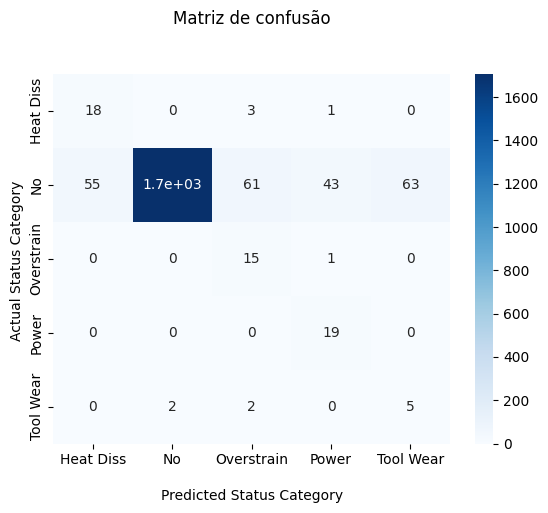

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.8842105263157894


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.25      0.82      0.38        22
              No Failure       1.00      0.88      0.94      1929
      Overstrain Failure       0.19      0.94      0.31        16
           Power Failure       0.30      1.00      0.46        19
       Tool Wear Failure       0.07      0.56      0.13         9

                accuracy                           0.88      1995
               macro avg       0.36      0.84      0.44      1995
            weighted avg       0.97      0.88      0.92      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  231


# ENSEMBLES

In [ ]:
#Criar o classificador ensembles
clfEns1 = AdaBoostClassifier()

#Treinar o modelo
clfEns1 = clfEns1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfEns1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.5520050125313283


In [ ]:
#MELHORAMENTO - MANUAL
#clfEns2 = AdaBoostClassifier(n_estimators=200)                                                                                                                            #Recall: 0.5520050125313283
#clfEns2 = AdaBoostClassifier(n_estimators=20)                                                                                                                             #Recall: 0.5520050125313283
#clfEns2 = AdaBoostClassifier(n_estimators=500)                                                                                                                            #Recall: 0.5520050125313283
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy"), n_estimators=200)                                                                               #Recall: 0.8890977443609023
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="log_loss"), n_estimators=200)                                                                              #Recall: 0.8884711779448622
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='best'), n_estimators=200)                                                              #Recall: 0.8859649122807017
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random'), n_estimators=200)                                                            #Recall: 0.8878446115288221
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=5), n_estimators=200)                                               #Recall: 0.9360902255639098
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10), n_estimators=200)                                              #Recall: 0.9385964912280702
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10, min_samples_split=5), n_estimators=200)                         #Recall: 0.9398496240601504
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10, min_samples_split=2), n_estimators=200)                         #Recall: 0.9411027568922306
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10, min_samples_split=2, min_samples_leaf=10), n_estimators=200)    #Recall: 0.9461152882205514
clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10, min_samples_split=2, min_samples_leaf=20), n_estimators=200)    #Recall: 0.9505012531328321
#clfEns2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=10, min_samples_split=2, min_samples_leaf=5), n_estimators=200)     #Recall: 0.9473684210526315


clfEns2 = clfEns2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfEns2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))

Recall:  0.9505012531328321


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {"n_estimators": (500,1000,2000),
              "learning_rate": (0.001,0.01,0.1)}

clfEns3 = AdaBoostClassifier()
clfEns3 = GridSearchCV(clfEns3, param_grid)
clfEns3 = clfEns3.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred3 = clfEns3.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred3, average='weighted'))
print(clfEns3.best_estimator_)

Recall:  0.899749373433584
AdaBoostClassifier(learning_rate=0.001, n_estimators=2000)


In [ ]:
clfEns = clfEns2
Y_test_pred = clfEns.predict(Xb_test_norm)

**Medidas de Avaliação**

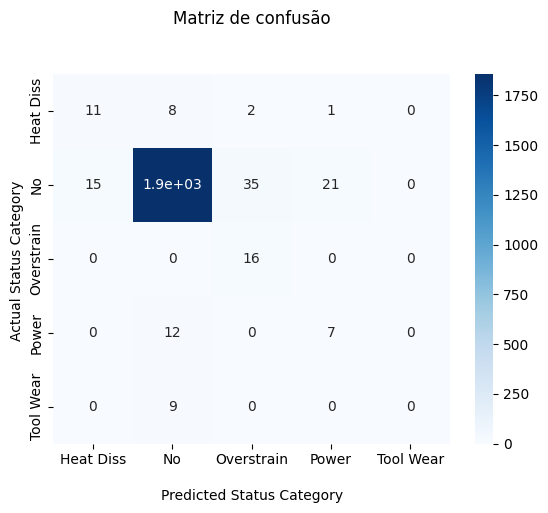

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.9483709273182958


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.42      0.50      0.46        22
              No Failure       0.98      0.96      0.97      1929
      Overstrain Failure       0.30      1.00      0.46        16
           Power Failure       0.24      0.37      0.29        19
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.95      1995
               macro avg       0.39      0.57      0.44      1995
            weighted avg       0.96      0.95      0.95      1995



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  103


# DECISION TREES

In [ ]:
#Criar o classificador árvore de decisão
clfDtc1 = DecisionTreeClassifier()

#Treinar o modelo
clfDtc1 = clfDtc1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfDtc1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8803258145363408


In [ ]:
#MELHORAMENTO - MANUAL
#clfDtc2 = DecisionTreeClassifier(criterion='gini')                                                              #Recall: 0.8834586466165414
#clfDtc2 = DecisionTreeClassifier(criterion='entropy')                                                           #Recall: 0.8847117794486216
#clfDtc2 = DecisionTreeClassifier(criterion='log_loss')                                                          #Recall: 0.881578947368421
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='best')                                          #Recall: 0.8834586466165414
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random')                                        #Recall: 0.8897243107769424
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5)                           #Recall: 0.856516290726817
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10)                          #Recall: 0.8483709273182958
clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25)                          #Recall: 0.899749373433584
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=45)                          #Recall: 0.8859649122807017
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_split=5)     #Recall: 0.8790726817042607
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_split=10)    #Recall: 0.849624060150376
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_split=2)     #Recall: 0.8740601503759399
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_split=25)    #Recall: 0.850250626566416
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_leaf=10)     #Recall: 0.8389724310776943
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_leaf=5)      #Recall: 0.8414786967418546
#clfDtc2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25, min_samples_leaf=20)     #Recall: 0.8120300751879699


clfDtc2 = clfDtc2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfDtc2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))

Recall:  0.899749373433584


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'criterion': ("gini", "entropy", "log_loss"), 
              'splitter':("best", "random"),
              'min_samples_split': [2, 5, 10, 15, 25, 30, 50, 85],
              'min_samples_leaf': [1, 5, 10, 25], 
              'max_depth': [500, 1000]}

clfDtc3 = DecisionTreeClassifier()
clfDtc3 = GridSearchCV(clfDtc3, param_grid)
clfDtc3 = clfDtc3.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred3 = clfDtc3.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred3, average='weighted'))
print(clfDtc3.best_estimator_)

Recall:  0.8822055137844611
DecisionTreeClassifier(max_depth=1000)


In [ ]:
clfDtc = clfDtc2
Y_test_pred = clfDtc.predict(Xb_test_norm)

**Medidas de Avaliação**

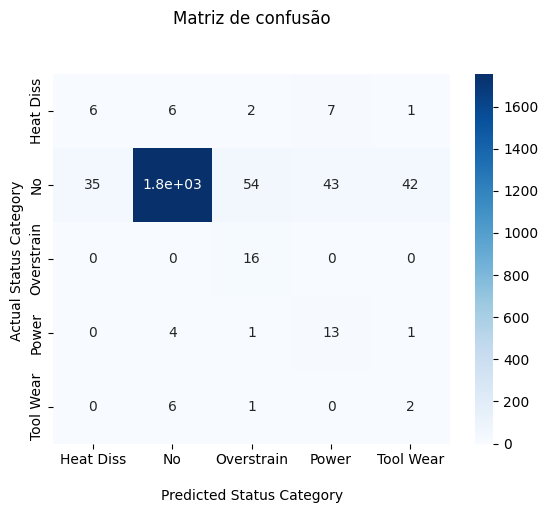

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.8982456140350877


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.15      0.27      0.19        22
              No Failure       0.99      0.91      0.95      1929
      Overstrain Failure       0.22      1.00      0.36        16
           Power Failure       0.21      0.68      0.32        19
       Tool Wear Failure       0.04      0.22      0.07         9

                accuracy                           0.90      1995
               macro avg       0.32      0.62      0.38      1995
            weighted avg       0.96      0.90      0.93      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  203


# K-NEARST NEIGHBORS (KNN)

In [ ]:
#Criar o classificador knn
clfKnn1 = KNN()

#Treinar o modelo
clfKnn1 = clfKnn1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfKnn1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.8515037593984962


In [ ]:
#MELHORAMENTO - MANUAL
#clfKnn2 = KNN(n_neighbors=10)                         #Recall: 0.8352130325814536 
#clfKnn2 = KNN(n_neighbors=20)                         #Recall: 0.8515037593984962
#clfKnn2 = KNN(n_neighbors=5)                          #Recall: 0.8515037593984962
clfKnn2 = KNN(n_neighbors=25)                         #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=35)                         #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=25, algorithm='auto')       #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=25, algorithm='ball_tree')  #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=25, algorithm='brute')      #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=25, leaf_size=10)           #Recall: 0.8609022556390977
#clfKnn2 = KNN(n_neighbors=25, leaf_size=100)          #Recall: 0.8609022556390977

clfKnn2 = clfKnn2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfKnn2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))

Recall:  0.8609022556390977


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [15, 30, 45, 60, 80], 
              'p': [1, 2, 5]}

clfKnn3 = KNN()
clfKnn3 = GridSearchCV(clfKnn3, param_grid)
clfKnn3 = clfKnn3.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred3 = clfKnn3.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred3, average='weighted'))
print(clfKnn3.best_estimator_)

Recall:  0.906641604010025
KNeighborsClassifier(leaf_size=15, n_neighbors=1)


In [ ]:
clfKnn = clfKnn3
Y_test_pred = clfKnn.predict(Xb_test_norm)

**Medidas de Avaliação**

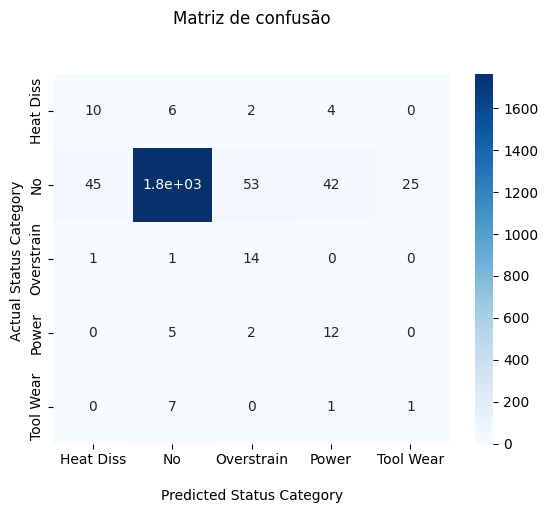

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.9027568922305764


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.18      0.45      0.26        22
              No Failure       0.99      0.91      0.95      1929
      Overstrain Failure       0.20      0.88      0.32        16
           Power Failure       0.20      0.63      0.31        19
       Tool Wear Failure       0.04      0.11      0.06         9

                accuracy                           0.90      1995
               macro avg       0.32      0.60      0.38      1995
            weighted avg       0.96      0.90      0.93      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  194


# NAIVE BAYES

In [ ]:
#Criar o classificador naive bayes
clfGnb1 = GaussianNB()

#Treinar o modelo
clfGnb1 = clfGnb1.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred1 = clfGnb1.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred1, average='weighted'))

Recall:  0.7807017543859649


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

clfGnb2 = GaussianNB()
clfGnb2 = GridSearchCV(clfGnb2, param_grid)
clfGnb2 = clfGnb2.fit(Xb_train_clean_norm, Yb_train_clean)
Y_validation_pred2 = clfGnb2.predict(Xb_validation_norm)

print('Recall: ', recall_score(Yb_validation, Y_validation_pred2, average='weighted'))
print(clfGnb2.best_estimator_)

Recall:  0.7819548872180451
GaussianNB(var_smoothing=0.01)


In [ ]:
clfGnb = clfGnb2
Y_test_pred = clfGnb.predict(Xb_test_norm)

**Medidas de Avaliação**

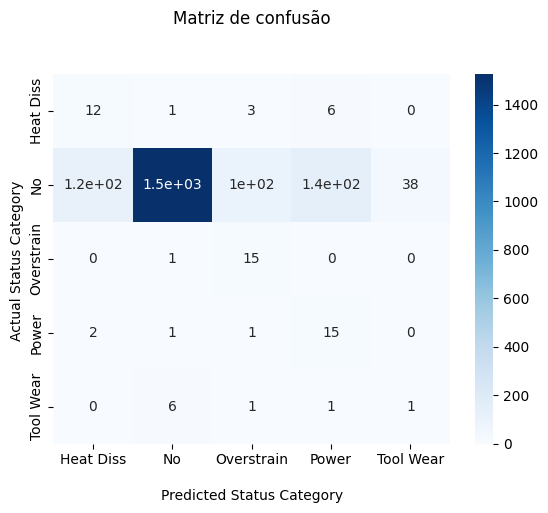

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Yb_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
ax.yaxis.set_ticklabels(['Heat Diss', 'No', 'Overstrain', 'Power', 'Tool Wear'])
plt.show()

In [ ]:
#Acurácia
print('Test data accuracy: ', accuracy_score(Yb_test, Y_test_pred))

Test data accuracy:  0.7869674185463659


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Yb_test, Y_test_pred))

CLASSIFICATION REPORT: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.09      0.55      0.15        22
              No Failure       0.99      0.79      0.88      1929
      Overstrain Failure       0.12      0.94      0.22        16
           Power Failure       0.09      0.79      0.16        19
       Tool Wear Failure       0.03      0.11      0.04         9

                accuracy                           0.79      1995
               macro avg       0.26      0.64      0.29      1995
            weighted avg       0.96      0.79      0.86      1995



In [ ]:
#Dados mal classificados
print('Misscalassified samples: ', (Yb_test != Y_test_pred).sum())

Misscalassified samples:  425
